# Analize results

In [1]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
getDSName(0)

'AB-TRAP_CIC'

### Get models and target DS. Only scan for now

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 3
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:27:14
setTarget: Removed 2800319 flows from other attack types



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


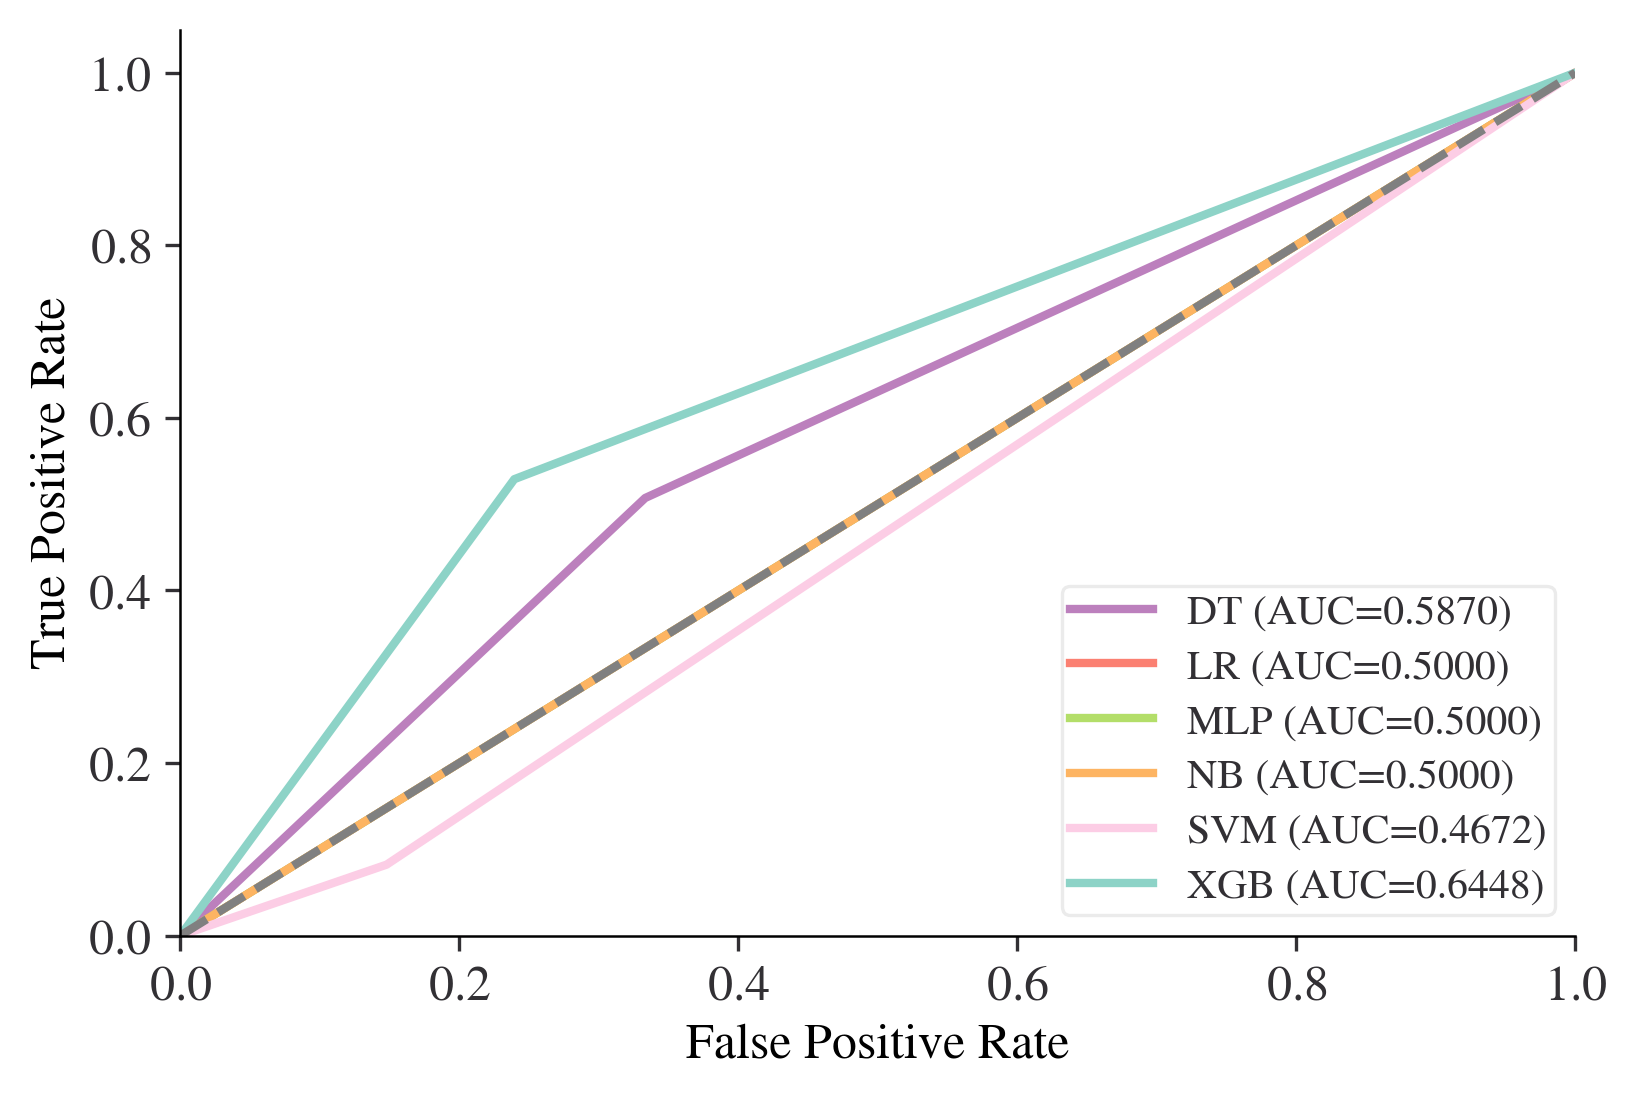

In [3]:
import os
from sklearn.metrics import roc_curve, auc
plt.style.use('supportFiles/plot_style.txt')

plt.figure()

index = 0
for model_key, model in models.items():
    fpr, tpr, thresholds = roc_curve( y, model.predict(prep.transform(X)) )
    AUC = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label="{} (AUC={:.4f})".format(model_key, AUC))
    index = index + 1
    # save ROC data
filename = 'dissertation/{0}_on_{1}_ROC.eps'.format(trainerDSName, testerDSName)
    #pd.DataFrame.from_dict(data={ 'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds }).to_csv(filename, index=False)
    
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig(filename, dpi=300, bbox_inches="tight")

# Feature Importance

In [2]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
getDSName(0)

'AB-TRAP_CIC'

In [3]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 1
modelName = "DT"
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:37:18
setTarget: Removed 2800319 flows from other attack types



In [4]:
clf = models['DT'].best_estimator_
relevantes = clf.feature_importances_
for index in range(len(X.columns)):#.iterrows():
    print(relevantes[index], X.columns[index])

0.030646460694887998 dst_port
0.00015401052224450892 protocol
0.05057666123323057 flow_duration
0.0012471967142684448 tot_fwd_pkts
0.0004937814954736841 tot_bwd_pkts
0.0011304913840673803 totlen_fwd_pkts
0.668094413096149 totlen_bwd_pkts
0.0 fwd_pkt_len_max
6.332667075819838e-07 fwd_pkt_len_min
0.01731374489327274 fwd_pkt_len_mean
1.1969071703233349e-05 fwd_pkt_len_std
2.7443346885025707e-05 bwd_pkt_len_max
0.01383389892443263 bwd_pkt_len_min
0.01241153345860021 bwd_pkt_len_mean
3.41707955262527e-06 bwd_pkt_len_std
0.0 flow_byts_s
0.0 flow_pkts_s
7.260043465016409e-06 flow_iat_mean
0.0 flow_iat_std
0.005227212844797067 flow_iat_max
0.0 flow_iat_min
0.0013094219358569445 fwd_iat_tot
0.004536486342682055 fwd_iat_mean
0.017576033666177226 fwd_iat_std
6.238579690585743e-05 fwd_iat_max
0.07287243827095125 fwd_iat_min
0.02650417743268357 bwd_iat_tot
0.0 bwd_iat_mean
5.516701659845986e-06 bwd_iat_std
1.3084624213039704e-05 bwd_iat_max
0.00040124477032468136 bwd_iat_min
4.706416913105081e-05 f

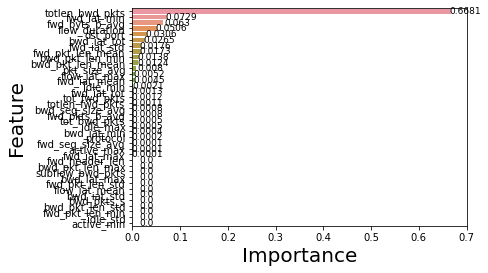

In [30]:
import seaborn as sns
import os

fi_df = pd.DataFrame(relevantes)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    g.text(row.feature_importance+0.03, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, modelName)
plt.savefig(filename, dpi=300, bbox_inches = "tight")

In [1]:
import pandas as pd
import numpy as np
import os
from supportFiles.myFunc import saveTable

files = [s for s in os.listdir("./dissertation/") if ((".csv" in s) and ("fscore_" in s))]
print(files)
for file in files:
    tableName = file.replace(".csv","")
    table = pd.read_csv("./dissertation/"+file, sep=',')
    caption = "Feature importance {0}".format(tableName)
    label = tableName
    saveTable(table, tableName, caption, label)

['fscore_AB-TRAP_CIC.csv', 'fscore_BoT-IoT_CIC.csv', 'fscore_NB15_CIC.csv', 'fscore_SCAN_AB-TRAP_CIC.csv', 'fscore_SCAN_BoT-IoT_CIC.csv', 'fscore_SCAN_CIC-IDS_CIC.csv', 'fscore_SCAN_NB15_CIC.csv', 'fscore_SCAN_ToN-IoT_CIC.csv', 'fscore_ToN-IoT_CIC.csv']
